In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# Add the directory to the list of input directories
input_directories = ['/kaggle/input', 'C:\\Users\\KIIT\\Desktop\\archive']

for input_dir in input_directories:
    for dirname, _, filenames in os.walk(input_dir):
        for filename in filenames:
            print(os.path.join(dirname, filename))


C:\Users\KIIT\Desktop\archive\Untitled.ipynb
C:\Users\KIIT\Desktop\archive\Untitled1.ipynb
C:\Users\KIIT\Desktop\archive\.ipynb_checkpoints\Untitled-checkpoint.ipynb
C:\Users\KIIT\Desktop\archive\.ipynb_checkpoints\Untitled1-checkpoint.ipynb
C:\Users\KIIT\Desktop\archive\data\Cassava___bacterial_blight\1000015157.jpg
C:\Users\KIIT\Desktop\archive\data\Cassava___bacterial_blight\1001320321.jpg
C:\Users\KIIT\Desktop\archive\data\Cassava___bacterial_blight\1003888281.jpg
C:\Users\KIIT\Desktop\archive\data\Cassava___bacterial_blight\1012426959.jpg
C:\Users\KIIT\Desktop\archive\data\Cassava___bacterial_blight\1018973237.jpg
C:\Users\KIIT\Desktop\archive\data\Cassava___bacterial_blight\102039365.jpg
C:\Users\KIIT\Desktop\archive\data\Cassava___bacterial_blight\1021758544.jpg
C:\Users\KIIT\Desktop\archive\data\Cassava___bacterial_blight\1024089865.jpg
C:\Users\KIIT\Desktop\archive\data\Cassava___bacterial_blight\102485576.jpg
C:\Users\KIIT\Desktop\archive\data\Cassava___bacterial_blight\10264

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [2]:
!pip install mplcyberpunk

In [3]:
!pip show mplcyberpunk

Name: mplcyberpunk
Version: 0.7.1
Summary: Add-on for Matplotlib to produce 'Cyberpunk' style plots
Home-page: https://github.com/dhaitz/mplcyberpunk
Author: Dominik Haitz
Author-email: dominik.haitz@gmx.de
License: MIT
Location: c:\users\kiit\anaconda3\lib\site-packages
Requires: matplotlib
Required-by: 


In [4]:
!pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\kiit\anaconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: 


In [5]:
import matplotlib.pyplot as plt
import pathlib, os, random, mplcyberpunk
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPooling2D, Conv2D, Activation

C:\Users\KIIT\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

batch_size = 32
img_height, img_width = 300, 300
input_shape = (img_height, img_width, 3)

datagen = ImageDataGenerator(rescale=1.0 / 255)

# For the training dataset
train_ds = datagen.flow_from_directory(
    r"C:\Users\KIIT\Desktop\archive\image data\train",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Assuming your dataset has sparse labels
    subset='training'
)

# For the validation dataset
val_ds = datagen.flow_from_directory(
    r"C:\Users\KIIT\Desktop\archive\image data\validation",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Assuming your dataset has sparse labels
    shuffle=False
)


Found 38104 images belonging to 13 classes.
Found 9458 images belonging to 13 classes.


In [12]:
class BaseModel(tf.keras.Model):
    def __init__(self):
        super(BaseModel, self).__init__()
        self.C1 = Conv2D(32, (3 * 3), padding='same', input_shape = input_shape)
        self.B1 = BatchNormalization()
        self.A1 = Activation('relu')
        self.P1 = MaxPooling2D(2, padding='same')
        
        self.C2 = Conv2D(32, (3 * 3), padding='same')
        self.B2 = BatchNormalization()
        self.A2 = Activation('relu')
        self.P2 = MaxPooling2D(2, padding='same')
        self.Dr1 = Dropout(0.3)
        
        self.C3 = Conv2D(32, (3 * 3), padding='same')
        self.B3 = BatchNormalization()
        self.A3 = Activation('relu')
        self.P3 = MaxPooling2D(2, padding='same')
        self.Dr2 = Dropout(0.3)
        
        self.F1 = Flatten()
        self.D1 = Dense(128, activation='relu')
        self.B4 = BatchNormalization()
        self.D2 = Dense(128, activation='relu')
        self.D3 = Dense(64, activation='relu')
        self.D4 = Dense(64, activation='relu')
        self.D5 = Dense(32, activation='relu')
        self.D6 = Dense(13, activation='softmax')
        
    def call(self, x):
        x = self.C1(x)
        x = self.B1(x)
        x = self.A1(x)
        x = self.P1(x)
        
        x = self.C2(x)
        x = self.B2(x)
        x = self.A2(x)
        x = self.P2(x)
        x = self.Dr1(x)
        
        x = self.C3(x)
        x = self.B3(x)
        x = self.A3(x)
        x = self.P3(x)
        x = self.Dr2(x)
        
        x = self.F1(x)
        x = self.D1(x)
        x = self.B4(x)
        x = self.D2(x)
        x = self.D3(x)
        x = self.D4(x)
        x = self.D5(x)
        y = self.D6(x)
        return y
    
model = BaseModel()

model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])

checkpoint_save_path = './Model.weights.h5'
if os.path.exists(checkpoint_save_path + '.index'):
    print('---------------------------------------Loading---------------------------------------')
    model.load_weights(checkpoint_save_path)

    
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path, save_best_only=True, save_weights_only=True)

history = model.fit(train_ds, epochs=5, batch_size=batch_size, validation_data=val_ds, callbacks=[cp_callback])

model.summary()

file = open('./BaseModelWeights.txt', 'w')
for v in model.trainable_variables:
    file.write(str(v.name) + '\n')
    file.write(str(v.shape) + '\n')
    file.write(str(v.numpy()) + '\n')
    
file.close()

Epoch 1/5


C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1191/1191 ━━━━━━━━━━━━━━━━━━━━ 5731s 5s/step - loss: 2.0359 - sparse_categorical_accuracy: 0.4035 - val_loss: 0.5443 - val_sparse_categorical_accuracy: 0.8245
Epoch 2/5
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 6000s 5s/step - loss: 0.5172 - sparse_categorical_accuracy: 0.8295 - val_loss: 0.3311 - val_sparse_categorical_accuracy: 0.8950
Epoch 3/5
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 4921s 4s/step - loss: 0.2745 - sparse_categorical_accuracy: 0.9098 - val_loss: 0.2088 - val_sparse_categorical_accuracy: 0.9344
Epoch 4/5
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3809s 3s/step - loss: 0.1633 - sparse_categorical_accuracy: 0.9474 - val_loss: 0.1363 - val_sparse_categorical_accuracy: 0.9582
Epoch 5/5
1191/1191 ━━━━━━━━━━━━━━━━━━━━ 3638s 3s/step - loss: 0.1067 - sparse_categorical_accuracy: 0.9659 - val_loss: 0.0823 - val_sparse_categorical_accuracy: 0.9765


Model: "base_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ ?                           │           7,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ ?                           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ ?                           │          82,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ ?                           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ ?                           │          82,976 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ ?                           │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │       5,914,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ ?                           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 18,361,641 (70.04 MB)

 Trainable params: 6,120,397 (23.35 MB)

 Non-trainable params: 448 (1.75 KB)

 Optimizer params: 12,240,796 (46.69 MB)

In [15]:
# Load the test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_ds = test_datagen.flow_from_directory(
    r"C:\Users\KIIT\Desktop\archive\image data\test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Assuming your dataset has sparse labels
    shuffle=False
)

# Predict the classes for the test images
y_pred = model.predict(test_ds)

# Get the ground truth labels
y_true = test_ds.labels

# Calculate the F1 score
from sklearn.metrics import f1_score

f1score = f1_score(y_true, np.argmax(y_pred, axis=1), average='macro')
print("F1 Score:", f1score)


Found 5741 images belonging to 13 classes.
180/180 ━━━━━━━━━━━━━━━━━━━━ 165s 916ms/step
F1 Score: 0.9607707970561112


In [16]:
# Evaluate model on the test data
test_loss, test_accuracy = model.evaluate(test_ds)

# Print the test accuracy
print("Test Accuracy:", test_accuracy)


180/180 ━━━━━━━━━━━━━━━━━━━━ 170s 947ms/step - loss: 0.1752 - sparse_categorical_accuracy: 0.9523
Test Accuracy: 0.9696916937828064


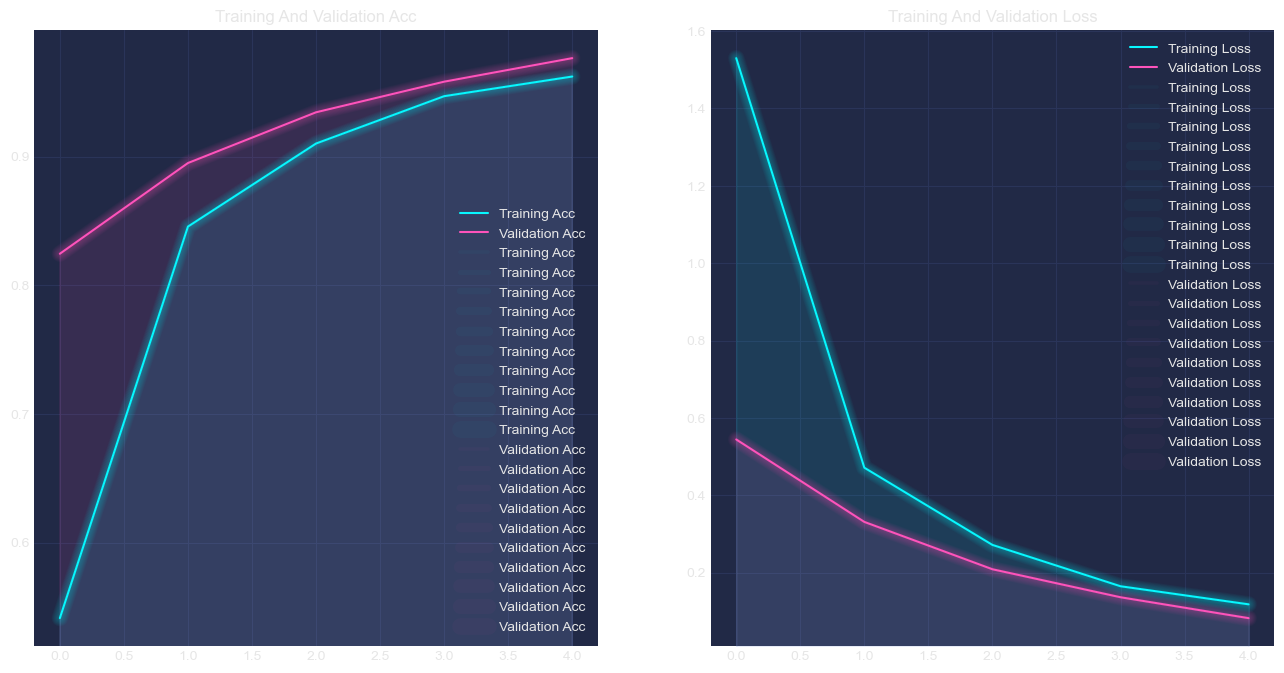

In [17]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16, 8))
plt.style.use('cyberpunk')
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Acc')
plt.plot(val_acc, label='Validation Acc')
plt.title('Training And Validation Acc')
mplcyberpunk.add_glow_effects()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training And Validation Loss')
mplcyberpunk.add_glow_effects()
plt.legend()

plt.show()

Found 5741 images belonging to 13 classes.


C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 168s 935ms/step


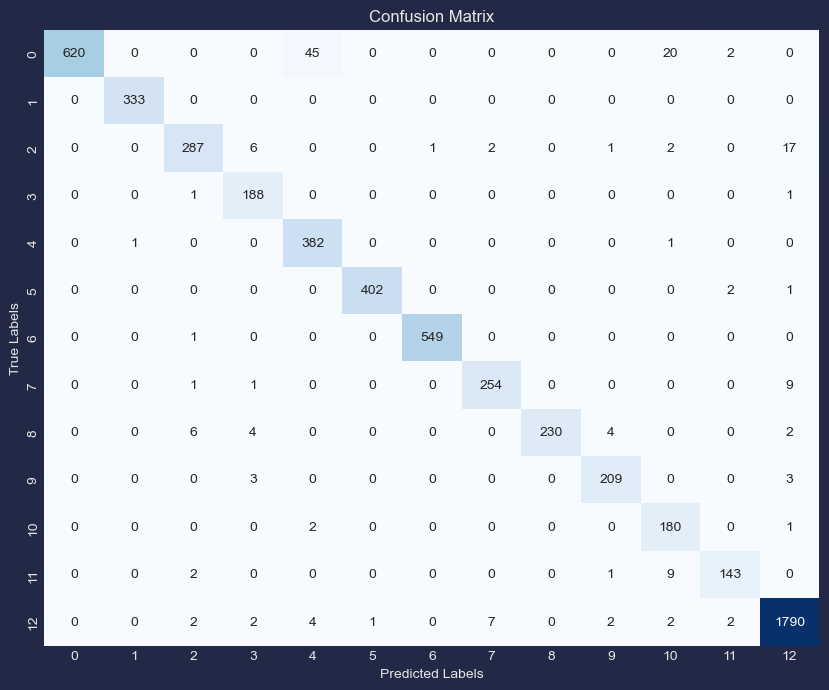

In [20]:
# Load test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_ds = test_datagen.flow_from_directory(
    r"C:\Users\KIIT\Desktop\archive\image data\test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Assuming your dataset has sparse labels
    shuffle=False
)

# Make predictions on test data
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_ds.classes

# Generate confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Found 5741 images belonging to 13 classes.


C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


180/180 ━━━━━━━━━━━━━━━━━━━━ 174s 966ms/step


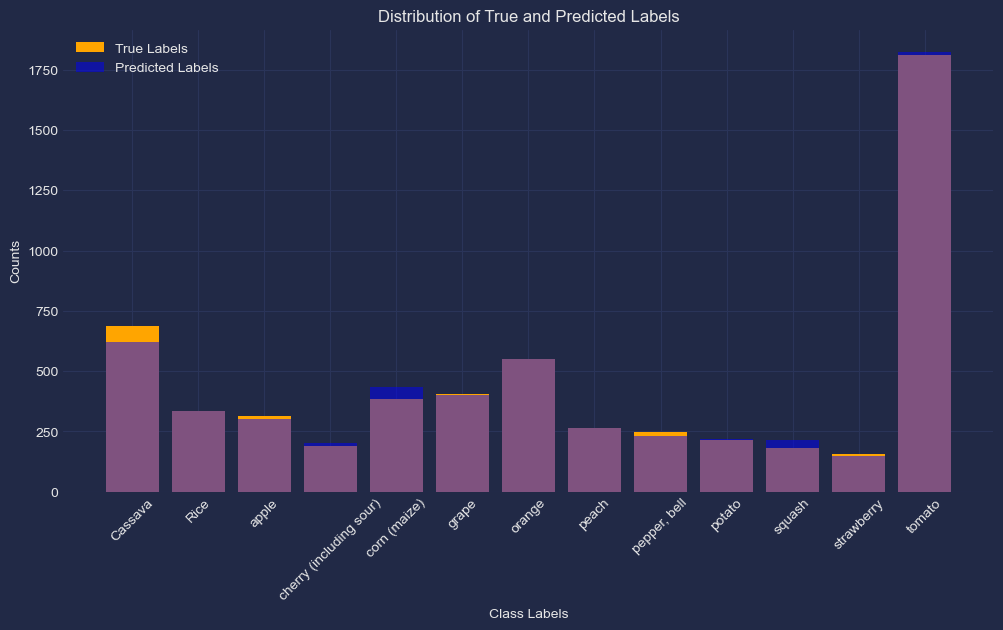

In [21]:
# Load test data
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_ds = test_datagen.flow_from_directory(
    r"C:\Users\KIIT\Desktop\archive\image data\test",
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='sparse',  # Assuming your dataset has sparse labels
    shuffle=False
)

# Get class labels
class_labels = list(test_ds.class_indices.keys())

# Make predictions on test data
y_pred = model.predict(test_ds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels
y_true = test_ds.classes

# Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(class_labels, cm.sum(axis=1), color='orange', label='True Labels')
plt.bar(class_labels, cm.sum(axis=0), color='blue', alpha=0.5, label='Predicted Labels')
plt.xlabel('Class Labels')
plt.ylabel('Counts')
plt.title('Distribution of True and Predicted Labels')
plt.legend()
plt.xticks(rotation=45)
plt.show()
